In [1]:
import numpy as np
import pandas as pd
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import cufflinks as cf
import plotly.plotly as py
from plotly.offline import download_plotlyjs,plot,iplot,init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

In [48]:
df = pd.read_csv('googleplaystore.csv')

In [228]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [5]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
df.isna().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [126]:
null_columns = df.columns[df.isnull().any()]
df[df.isnull().any(axis=1)][null_columns]

,Rating,Type,Content Rating,Current Ver,Android Ver
15,3.2,Free,Everyone,NaN,4.2 and up
23,NaN,Free,Everyone,1.0.0,4.1 and up
113,NaN,Free,Everyone 10+,8.0,3.0 and up
123,NaN,Free,Everyone,1.3,4.1 and up
126,NaN,Free,Teen,1.15,4.1 and up
129,NaN,Free,Mature 17+,2.0,2.3 and up
130,NaN,Free,Everyone 10+,2.0,3.0 and up
134,NaN,Free,Mature 17+,3.0,3.0 and up
163,NaN,Free,Everyone,1.0,2.3 and up
180,NaN,Free,Everyone,3.0,6.0 and up


In [49]:
df.iloc[10472:10473,5:6]=str('0')

In [50]:
df['Installs'] = df['Installs'].apply(lambda x: int(''.join(list(map(str,filter(str.isdigit,x))))))
# df['Installs'] = df['Installs'].apply(lambda x: int(x))
# ss=df['Installs'].re.findall('(\d+)').astype(int)
# ss

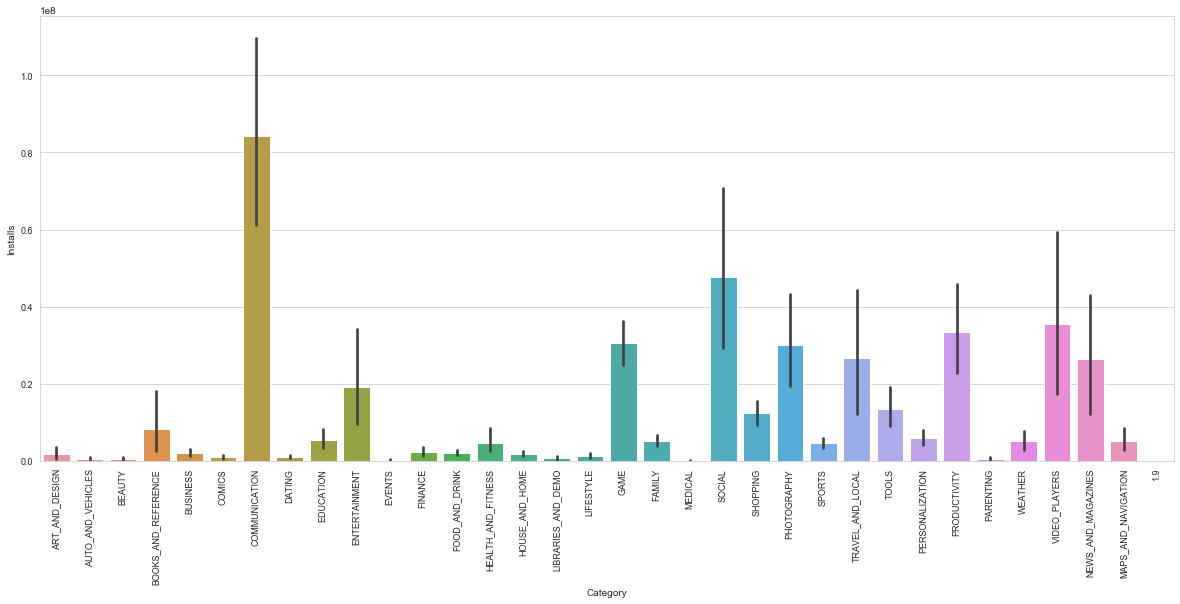

In [101]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12,9))
fig = plt.gcf()
fig.set_size_inches(16.5, 8.5)
sns.barplot(y='Installs',x='Category',data=df)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=90)
plt.tick_params(labelsize=9,which='major' )
plt.tight_layout()

In [6]:
df.iplot(kind='bar',x='Category',y='Installs')

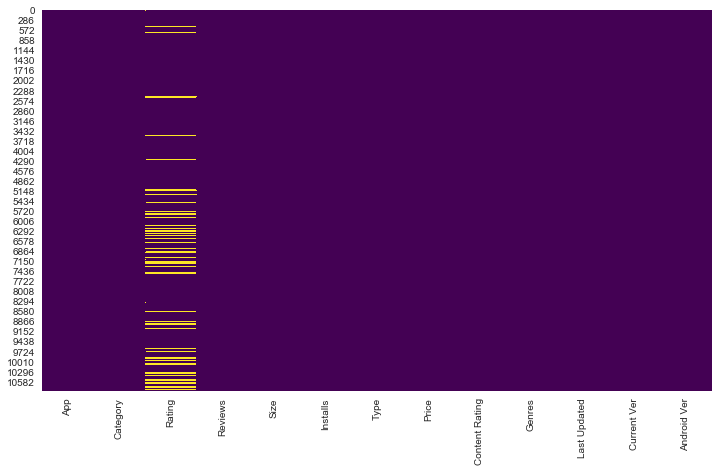

In [123]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [137]:
df.isna()[df.columns].sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

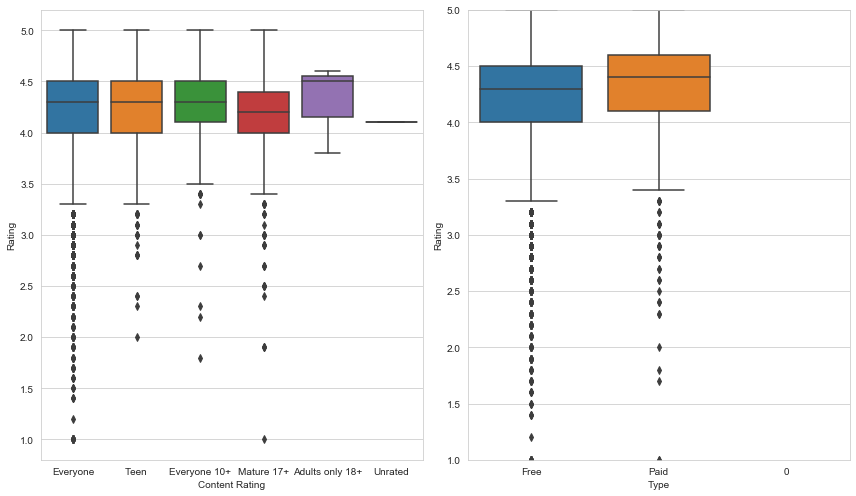

In [162]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,7))
sns.boxplot(data=df,y='Rating',x='Content Rating',ax=axes[0])
sns.boxplot(data=df,y='Rating',x='Type',ax=axes[1])
axes[1].set_ylim(1.0,5.0)
plt.tight_layout()

In [55]:
def impute(cols):
    rating = cols[0]
    content_rating = cols[1]
    if pd.isnull(rating):
        if content_rating == 'Everyone':
            return 4.3
        elif content_rating == 'Teen':
            return 4.3            
        elif content_rating == 'Everyone 10+':
            return 4.3        
        elif content_rating == 'Mature 17+':
            return 4.2        
        elif content_rating == 'Adults Only 18+':
            return 4.5
        elif content_rating == 'Unrated':
            return 4.0    
        
    else:
        return rating
        
df['Rating'] = df[['Rating','Content Rating']].apply(impute,axis=1)                 
        
        

In [56]:
df = df.dropna(subset=['Content Rating','Type'])

In [57]:
df['Price'] = list(map(float,df['Price'].apply(lambda x: x.replace('$','').strip())))

In [58]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [71]:
ds = df['Size'].apply(lambda x: float(x.replace('M','000000')) or 
                      float(x.replace('K','000')) or 
                      float(x.replace('B','000000000')))

ValueError: could not convert string to float: 'Varies with device'

In [73]:
df[(df['Size']=='Varies with device')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000,Free,0.00,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000,Free,0.00,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,1000000,Free,0.00,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,5000000,Free,0.00,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,100000,Free,0.00,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
73,PDD-UA,AUTO_AND_VEHICLES,4.8,736,Varies with device,100000,Free,0.00,Everyone,Auto & Vehicles,"July 29, 2018",2.9,2.3.3 and up
85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777,Varies with device,1000000,Free,0.00,Everyone,Auto & Vehicles,"August 4, 2018",Varies with device,Varies with device
88,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,13372,Varies with device,1000000,Free,0.00,Everyone,Auto & Vehicles,"August 3, 2018",Varies with device,Varies with device
89,Zona Azul Digital Fácil SP CET - OFFICIAL São ...,AUTO_AND_VEHICLES,4.6,7880,Varies with device,100000,Free,0.00,Everyone,Auto & Vehicles,"May 10, 2018",4.6.5,Varies with device
92,Fuelio: Gas log & costs,AUTO_AND_VEHICLES,4.6,65786,Varies with device,1000000,Free,0.00,Everyone,Auto & Vehicles,"August 2, 2018",Varies with device,4.0.3 and up
